# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from covid import * #allows us to use our functions directly

## Test of the PD3S algorrithm to compute the MAP 

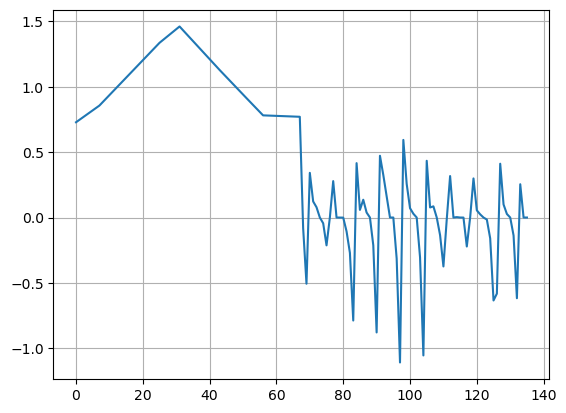

In [3]:
plt.figure()
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
MAP= PD3S(Z,phi)
plt.plot(MAP)
plt.grid()

## Test of the Randow walk method on the data

C:\PAUL\Cours\4A\PIR\mcmc-epidemic\covid.py:21: RuntimeWarning: invalid value encountered in log
  log_pi_val = -np.sum(R*phi + c*O - Z*np.log(R*phi + c*O + 1e-10)) - lambda_R*np.linalg.norm(D@R + shR, ord = 1) - lambda_O*np.linalg.norm(C@O+shO, ord = 1)


50000


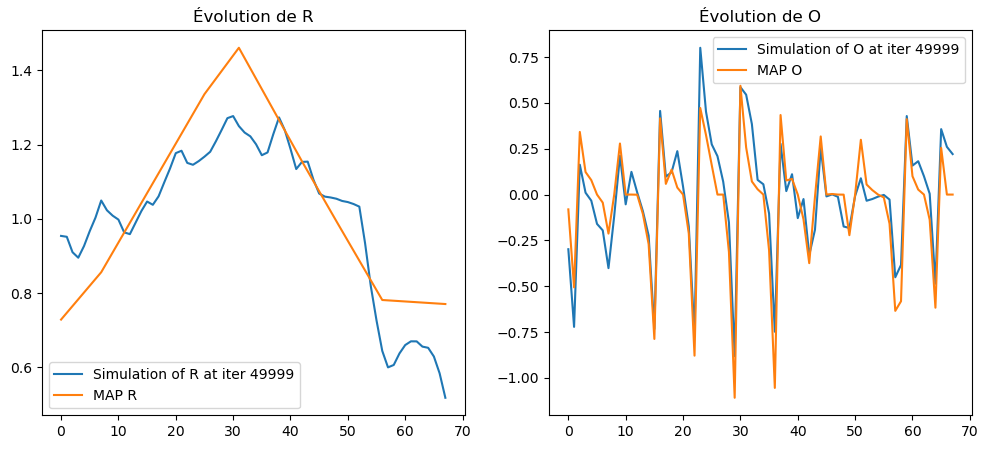

100000


<Figure size 640x480 with 0 Axes>

150000


<Figure size 640x480 with 0 Axes>

End of the burn-in
200000
250000
300000


In [6]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
theta_tab,theta_tilde_tab, accepts, gammas,end_burn_in=MHRW(T,Z,phi,lambda_R,lambda_O,MAP,niter=3e5,method="image")

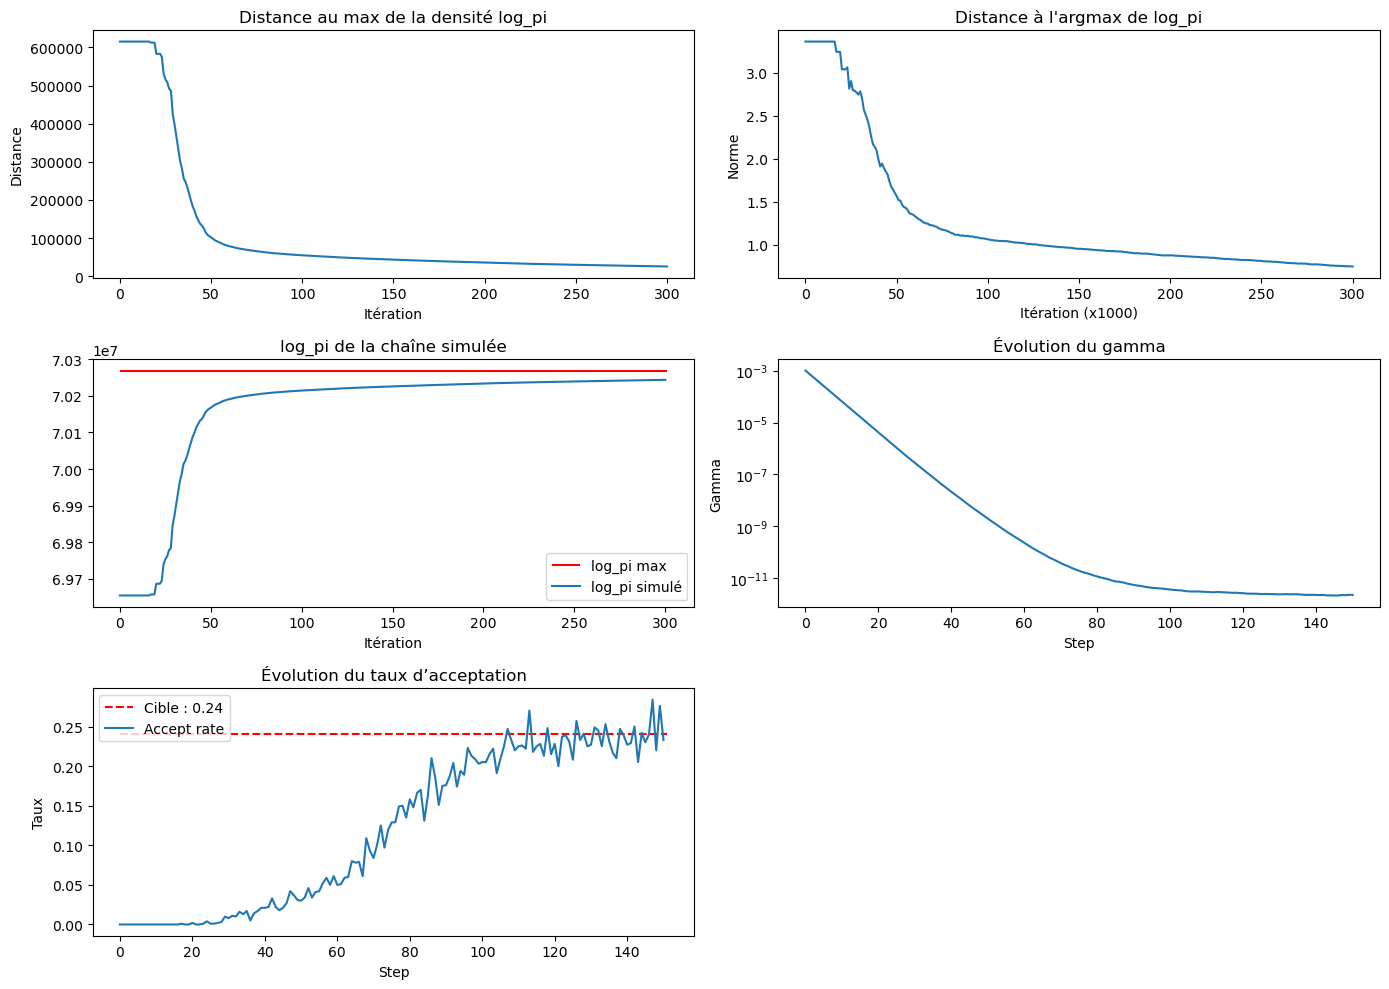

In [9]:
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
a = 0.73597
b = 0.73227
barsh=Buildbarsh(T,a,b)
D=BuildD(T)
C = np.diag(phi)
logpi_max=log_pi(MAP, phi,Z, lambda_R, D, barsh, lambda_O,phi,C)
log_pi_tab = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab[::1000])

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # plus simple pour indexer

# 1. Distance au max de la densité log_pi
axes[0].plot(np.abs(log_pi_tab - logpi_max))
axes[0].set_title("Distance au max de la densité log_pi")
axes[0].set_xlabel("Itération")
axes[0].set_ylabel("Distance")

# 2. Distance à l'argmax de la densité log_pi
axes[1].plot(np.linalg.norm(theta_tab[::1000] - MAP, axis=1))
axes[1].set_title("Distance à l'argmax de log_pi")
axes[1].set_xlabel("Itération (x1000)")
axes[1].set_ylabel("Norme")

# 3. Log_pi de la chaîne simulée
axes[2].hlines(logpi_max, xmin=0, xmax=len(log_pi_tab), color='red', label="log_pi max")
axes[2].plot(log_pi_tab, label="log_pi simulé")
axes[2].set_title("log_pi de la chaîne simulée")
axes[2].legend()
axes[2].set_xlabel("Itération")

# 4. Évolution de gamma
axes[3].semilogy(gammas)
axes[3].set_title("Évolution du gamma")
axes[3].set_xlabel("Step")
axes[3].set_ylabel("Gamma")

# 5. Évolution du taux d’acceptation
axes[4].hlines(0.24, xmin=0, xmax=len(accepts), linestyle='--', color='red', label="Cible : 0.24")
axes[4].plot(accepts, label="Accept rate")
axes[4].set_title("Évolution du taux d’acceptation")
axes[4].set_xlabel("Step")
axes[4].set_ylabel("Taux")
axes[4].legend()

# Supprimer le dernier subplot vide (le 6e)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


In [7]:
theta_tab[-1,:]

array([ 9.13991488e-01,  9.11114571e-01,  9.08221887e-01,  9.05324324e-01,
        9.19730041e-01,  9.34136130e-01,  9.48552548e-01,  9.62984159e-01,
        9.58720466e-01,  9.54566445e-01,  9.50474496e-01,  9.46381766e-01,
        9.55827008e-01,  9.87755540e-01,  1.01977924e+00,  1.05180931e+00,
        1.08386895e+00,  1.11653220e+00,  1.14919223e+00,  1.18180859e+00,
        1.21438200e+00,  1.24028077e+00,  1.25566885e+00,  1.27098442e+00,
        1.28629466e+00,  1.30114658e+00,  1.31543111e+00,  1.32946981e+00,
        1.34336137e+00,  1.35717792e+00,  1.36560178e+00,  1.36020901e+00,
        1.35461056e+00,  1.34873655e+00,  1.34281841e+00,  1.33690276e+00,
        1.33097376e+00,  1.32505666e+00,  1.31915293e+00,  1.25891798e+00,
        1.19870705e+00,  1.13848348e+00,  1.11976853e+00,  1.10112310e+00,
        1.08202216e+00,  1.06295005e+00,  1.04555097e+00,  1.02816893e+00,
        1.01079261e+00,  9.93401828e-01,  9.75983806e-01,  9.58563738e-01,
        9.41139050e-01,  

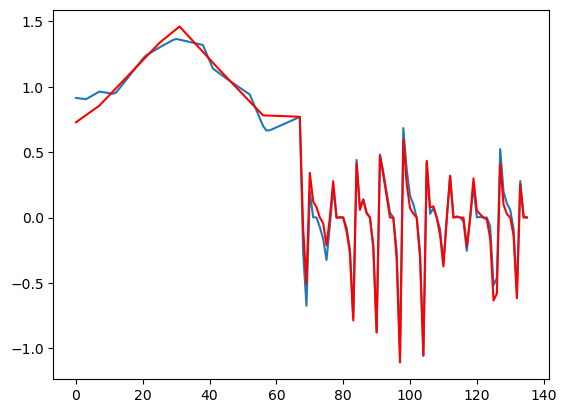

In [8]:
plt.figure()
plt.plot(theta_tab[-1,:])
plt.plot(MAP,color='red')
plt.show()

In [ ]:
plt.figure()
plt.title("Distance au max de la densité log_pi")
plt.plot(abs(log_pi_tab-logpi_max))
plt.show()

plt.figure()
plt.title("Distance à l'argmax de la densité log_pi")
plt.plot(np.linalg.norm(theta_tab[::1000]-MAP,axis=1))
plt.show()

plt.figure()
plt.title("Log_pi de la chaîne simulée")
plt.hlines(logpi_max,xmin=0,xmax=len(log_pi_tab),color='red')
plt.plot(log_pi_tab)
plt.show()

plt.figure()
plt.title("Evolution du gamma")
plt.logy(gammas)
plt.show()

plt.figure()
plt.title("Evolution du taux d'acceptation")
plt.hlines(0.24,xmin=0,xmax=len(accepts),linestyle='--',color='red')
plt.plot(accepts)
plt.show()